# Импорт библиотек

In [450]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего


# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler # Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder # Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder # Импортируем порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline. Ни добавить, ни убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [451]:
plt.style.use('dark_background') # для модных черных рисунков

In [452]:
import warnings
warnings.filterwarnings('ignore')

# Набор данных

**Предсказание цены на дом (из 2й домашки)**

Набор данных представляет собой 1460 строк и 79 переменных, описывающих (почти) каждый аспект жилых домов в Эймсе, штат Айова.

С помощью этого датасета решается задача регрессии - предсказать окончательную стоимость дома (перменная SalePrice).

Наша цель - увидеть, как те или иные признаки влияют на стоимость дома, а также их взаимосвязь друг с другом.

Так как признаков очень много, выберу по 5 самых интересующих меня категориальных и числовых признаков для будующей работы.

Выбранные числовые признаки:

LotArea (площадь участка в квадратных футах)

YearBuilt (год постройки)

BedroomAbvGr (кол-во спален выше уровня земли)

GarageArea (площадь гаража в квадратных футах)

MoSold (месяц продажи)

Выбранные категориальные признаки:

Street (тип дороги, ведущей к участку)

Utilities (тип доступных коммунальных услуг)

LotConfig (конфигурация участка)

Condition1 (близость к различным условиям)

RoofStyle (тип крыши)

Нашей целевой переменной остается SalePrice

In [453]:
df = pd.read_csv('https://raw.githubusercontent.com/dariaValerievna/Analytics/refs/heads/dariaValerievna-homework-1/train.csv', delimiter = ',') # считываем файл из интернета
df #выведем DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [454]:
#удаляем все колонки, в которых присутсвует хоть одно значение Nan
df = df.dropna(axis=1)

In [455]:
#запишем выбранные признаки в новые переменные
cat_columns_new = ['Street', 'Utilities', 'LotConfig', 'Condition1', 'RoofStyle']
num_columns_new = ['LotArea', 'YearBuilt', 'BedroomAbvGr', 'GarageArea', 'MoSold', 'SalePrice']

#удаляем из датафрейма остальные признаки
df = df.drop(columns=[col for col in df.columns if (col not in cat_columns_new) and (col not in num_columns_new)])

df

,LotArea,Street,Utilities,LotConfig,Condition1,YearBuilt,RoofStyle,BedroomAbvGr,GarageArea,MoSold,SalePrice
0,8450,Pave,AllPub,Inside,Norm,2003,Gable,3,548,2,208500
1,9600,Pave,AllPub,FR2,Feedr,1976,Gable,3,460,5,181500
2,11250,Pave,AllPub,Inside,Norm,2001,Gable,3,608,9,223500
3,9550,Pave,AllPub,Corner,Norm,1915,Gable,3,642,2,140000
4,14260,Pave,AllPub,FR2,Norm,2000,Gable,4,836,12,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,AllPub,Inside,Norm,1999,Gable,3,460,8,175000
1456,13175,Pave,AllPub,Inside,Norm,1978,Gable,3,500,2,210000
1457,9042,Pave,AllPub,Inside,Norm,1941,Gable,4,252,5,266500
1458,9717,Pave,AllPub,Inside,Norm,1950,Hip,2,240,4,142125


# Предварительная обработка данных

## Предварительная обработка числовых признаков

**Чистим столбцы**

In [456]:
question_lotArea = df[(df.LotArea > 1e5)]
df = df.drop(question_lotArea.index)

question_lotArea_2 = df[(df.LotArea > 16000)]
df = df.drop(question_lotArea_2.index)

question_yearBuilt = df[(df.YearBuilt < 1900)]
df = df.drop(question_yearBuilt.index)

question_garageArea = df[(df.GarageArea < 200)]
df = df.drop(question_garageArea.index)

question_garageArea_1 = df[(df.GarageArea > 1000)]
df = df.drop(question_garageArea_1.index)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
df.tail()

,LotArea,Street,Utilities,LotConfig,Condition1,YearBuilt,RoofStyle,BedroomAbvGr,GarageArea,MoSold,SalePrice
1239,7917,Pave,AllPub,Inside,Norm,1999,Gable,3,460,8,175000
1240,13175,Pave,AllPub,Inside,Norm,1978,Gable,3,500,2,210000
1241,9042,Pave,AllPub,Inside,Norm,1941,Gable,4,252,5,266500
1242,9717,Pave,AllPub,Inside,Norm,1950,Hip,2,240,4,142125
1243,9937,Pave,AllPub,Inside,Norm,1965,Gable,3,276,6,147500


**Визуализируем**

 Видно, что все столбцы имеют относительно нормальное распределение

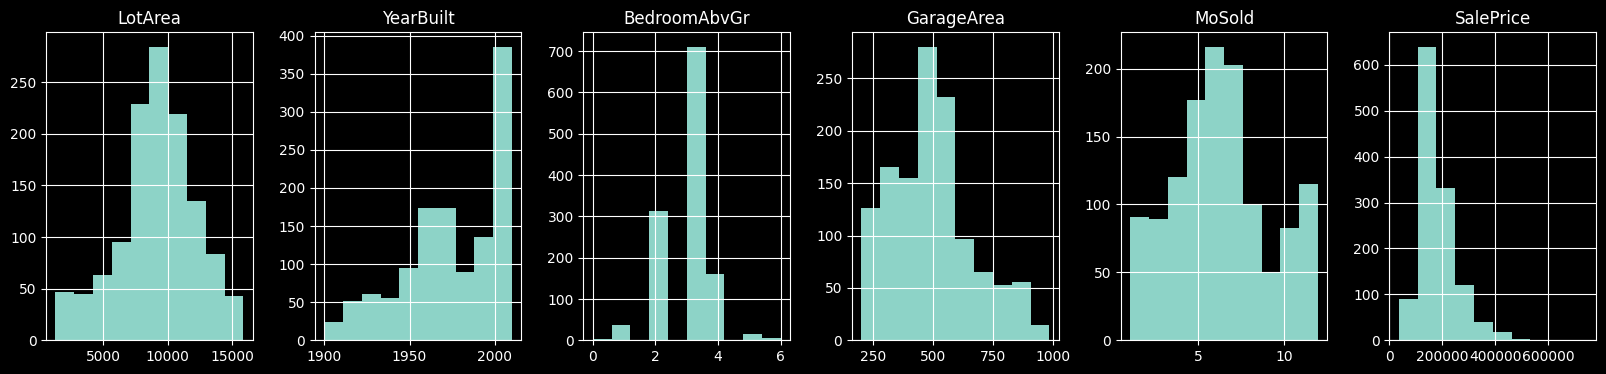

In [457]:
fig, axs = plt.subplots(1,6,figsize=(20,  4)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим, что у нас будет 1 строка и 4 столбца

df.hist(column = num_columns_new, ax = axs);

**Нормализация**

In [458]:
DF  = df.copy()
Xmin = df[num_columns_new].min() # находим минимум (для каждого числового признака)
Xmax = df[num_columns_new].max() # находим максимум (для каждого числового признака)
                                                # ↓ каждый столбец делится на свою разницу максимума и минимума
DF[num_columns_new] = (df[num_columns_new]- Xmin)/( Xmax - Xmin) # реализуем нормализацию. матричные операции работают
                                        # ↑ из каждого стобца вычитаем свой минимум

**Стандартизация**

In [459]:
M = DF[num_columns_new].mean() # находим среднее (для каждого числового признака)
STD = DF[num_columns_new].std() # находим стандартное отклонение (для каждого числового признака)
DF[num_columns_new] = (DF[num_columns_new]-M)/STD # реализуем стандартизацию. матричные операции работают

**Степенное преобразование**

In [460]:
pt = PowerTransformer()

pt.fit(DF[num_columns_new]);

In [461]:
power = pt.transform(DF[num_columns_new])
df_power = pd.DataFrame(power, columns= num_columns_new)
df_power

,LotArea,YearBuilt,BedroomAbvGr,GarageArea,MoSold,SalePrice
0,-0.306116,1.107616,0.196830,0.426528,-1.722636,0.653393
1,0.077258,-0.121489,0.196830,-0.092431,-0.462927,0.280031
2,0.670275,1.003802,0.196830,0.743289,0.996955,0.827796
3,0.060031,-1.764715,0.196830,0.913253,-1.722636,-0.512424
4,1.847303,0.952598,1.510394,1.792297,1.968945,1.096774
...,...,...,...,...,...,...
1239,-0.475720,0.901870,0.196830,-0.092431,0.655154,0.174496
1240,1.411101,-0.044420,0.196830,0.153177,-1.722636,0.671714
1241,-0.112084,-1.174282,1.510394,-1.591973,-0.462927,1.244976
1242,0.117757,-0.941272,-1.100337,-1.687737,-0.870326,-0.465188


## Предварительная обработка категориальных признаков

**Порядковое коидрование**

In [462]:
ordinal = OrdinalEncoder()
ordinal.fit(DF[cat_columns_new]);

Ordinal_encoded = ordinal.transform(DF[cat_columns_new])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns_new)

**One-hot кодирование многозначных признаков**

In [463]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output= False)
ohe.fit(DF[cat_columns_new]);

ohe_feat = ohe.transform(DF[cat_columns_new])
#                                       ↓с помощью метода получаем полные имена One-Hot кодировки
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)

## Pipeline

In [464]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.target_mean = {}

    def fit(self, X, y):
        if self.cols is None:
            self.cols = X.columns
        for col in self.cols:
            self.target_mean[col] = {}
            X_copy = X.copy()
            X_copy[y.name]=y
            self.target_mean[col] = X_copy.groupby(col)[y.name].mean().to_dict()
        return self

    def transform(self, X):
        for col in self.cols:
            X[col] = X[col].map(self.target_mean[col])
            X[col] = X[col].fillna(np.mean(X[col]))
        return X

In [465]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        self.columns = X.columns

        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

    def get_feature_names_out(self, feature_names):
        return self.columns

In [466]:
num_pipe_lotArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler())
])
num_lotArea = ['LotArea']

num_pipe_GarArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler()),
     ('power', PowerTransformer())
])
num_GarArea = ['GarageArea']

num_pipe_BAG = Pipeline([
    ('power', PowerTransformer())
])
num_BAG = ['BedroomAbvGr']

num_pipe_YB = Pipeline([
    ('power', PowerTransformer())
])
num_YB = ['YearBuilt']

num_pipe_SP = Pipeline([
    ('power', PowerTransformer())
])
num_SP = ['SalePrice']

num_pipe_moSold = Pipeline([
    ('scaler', StandardScaler())
])
num_moSold = ['MoSold']

cat_pipe_street = Pipeline([
    ('encoder', TargetEncoder())

])
cat_street = ['Street']

cat_pipe_util = Pipeline([
    ('encoder', TargetEncoder())

])
cat_util = ['Utilities']

cat_pipe_lotCon = Pipeline([
    ('encoder', TargetEncoder())

])
cat_lotCon = ['LotConfig']

cat_pipe_con1 = Pipeline([
    ('encoder', TargetEncoder())

])
cat_con1 = ['Condition1']

cat_pipe_roofSt = Pipeline([
    ('encoder', TargetEncoder())

])
cat_roofSt = ['RoofStyle']

# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
    ('cat_street', cat_pipe_street, cat_street),
    ('cat_util', cat_pipe_util, cat_util),
    ('cat_lotCon', cat_pipe_lotCon, cat_lotCon),
    ('cat_con1', cat_pipe_con1, cat_con1),
    ('cat_roofSt', cat_pipe_roofSt, cat_roofSt),
])

In [467]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,
                    cat_street,
                    cat_util,
                    cat_lotCon,
                    cat_con1,
                    cat_roofSt,])

# Обучение модели гистограммного градиентного бустинга  

In [468]:
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.model_selection import train_test_split # функция разбиения на тренировочную и валидационную выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели

**Считываем данные, разбиваем на тренировочную и валидационную**

In [469]:
# не забываем удалить целевую переменную цену из признаков
X, y = DF.drop(columns = ['SalePrice']), DF['SalePrice']

# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

**Преобразуем данные**

In [470]:
# Сначала обучаем на тренировочных данных, при этом одновременно трансформируем их
X_train_prep = preprocessors_all.fit_transform(X_train, y_train)
# потом трансформируем на валидационных данных
X_val_prep = preprocessors_all.transform(X_val)

**Обучаем модель**

In [471]:
model_hgb = HistGradientBoostingRegressor(n_iter_no_change=10,
                                learning_rate=0.1,
                                max_iter=150,
                                          )

model_hgb.fit(X_train_prep, y_train)

HistGradientBoostingRegressor(max_iter=150)

In [472]:
model_hgb.train_score_

array([], dtype=float64)

In [473]:
model_hgb.validation_score_

array([], dtype=float64)

**Визуализация значимости признаков**

In [474]:
from sklearn.inspection import permutation_importance

def feature_importance_plotter(model, X, y, feature_names):
    # Вычисление важности с помощью перестановок
    perm_importance = permutation_importance(model, X, y, scoring="neg_mean_squared_error")
    feature_importance = perm_importance.importances_mean

    # Сортировка признаков по значимости
    sorted_idx = np.argsort(feature_importance)

    # Параметры графика
    ypos = np.arange(len(feature_names))

    # Построение графика
    plt.figure(figsize=(8, 4))
    plt.barh(ypos, feature_importance[sorted_idx], align="center")
    plt.xlabel("Значимость признака")
    plt.ylabel("Признаки")
    plt.yticks(ypos, np.array(feature_names)[sorted_idx])
    plt.title("Значимость признаков")
    plt.show()

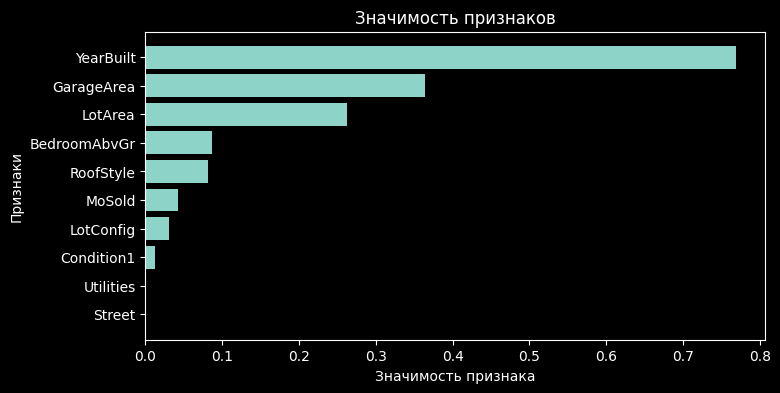

In [475]:
feature_importance_plotter(model_hgb, X_train_prep, y_train, columns)

# Оценка метрик

In [476]:
def calculate_metric(model_pipe, X, y, metric = r2_score):
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [477]:
print(f"r2 на тренировочной выборке: {calculate_metric(model_hgb, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model_hgb, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model_hgb, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model_hgb, X_val_prep, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.9431
r2 на валидационной выборке: 0.6963
mse на тренировочной выборке: 0.0596
mse на валидационной выборке: 0.2683


# Кросс-валидация

In [478]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [479]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [480]:
cross_validation (X_train_prep, y_train,
                  model_hgb,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.331929,0.007015,0.569007,-0.255634,-0.385003,-1.575767
1,0.356261,0.006985,0.549563,-0.689756,-0.434078,-6.046164
2,0.343509,0.007577,0.756714,-0.310717,-0.392078,-2.635712
3,0.318021,0.007646,0.668500,-0.266359,-0.380420,-1.706592
4,0.334817,0.007714,0.610421,-0.296717,-0.404979,-1.682716




test_R2      0.630841
test_-MSE   -0.363837
test_-MAE   -0.399312
test_-Max   -2.729390
dtype: float64


Очень хорошие метрики на тренировочной выборке и все таки намного хуже на валидационной, лучше когда разница меньше

# Визуализация ошибок от scikit-learn

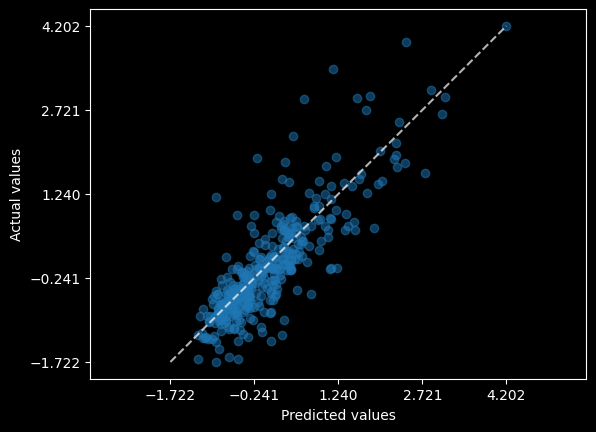

In [481]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model_hgb.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
        line_kwargs = {"color" : 'white'}

);

Тут в целом все хорошо, огромных отклонений нет

# Подбираем оптимальные гиперпараметры

In [482]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.stats import uniform, randint

# Определяем пространство поиска
param_distributions = {
    "learning_rate": uniform(0.01, 0.3),
    "max_iter": randint(100, 300),
    "max_leaf_nodes": randint(10, 50),
    "min_samples_leaf": randint(1, 20),
    "l2_regularization": uniform(0.0, 1.0),
}

# Оптимизация
search = RandomizedSearchCV(
    HistGradientBoostingRegressor(),
    param_distributions,
    n_iter=50,
    scoring="neg_mean_squared_error",
    cv=5,
    random_state=42,
    n_jobs=-1
)
search.fit(X_train_prep, y_train)

# Лучшая модель и параметры
best_model = search.best_estimator_

In [483]:
print(f"r2 на тренировочной выборке: {calculate_metric(best_model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(best_model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(best_model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(best_model, X_val_prep, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.8946
r2 на валидационной выборке: 0.7154
mse на тренировочной выборке: 0.1104
mse на валидационной выборке: 0.2514


In [484]:
cross_validation (X_train_prep, y_train,
                  best_model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.232226,0.007721,0.611985,-0.230143,-0.352635,-1.425329
1,0.227379,0.007431,0.558796,-0.675617,-0.440821,-5.951976
2,0.267055,0.010605,0.782131,-0.278256,-0.352785,-2.567518
3,0.340365,0.011658,0.731819,-0.215483,-0.317751,-1.569723
4,0.324505,0.009305,0.637830,-0.275841,-0.386913,-1.738846




test_R2      0.664512
test_-MSE   -0.335068
test_-MAE   -0.370181
test_-Max   -2.650678
dtype: float64


Гиперпараметры рандомизированного поиска значительно улучшили метрику r2 и немного метрки ошибок, в том числе и на валидационной выборке

# Использование топ признаков

In [485]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_hgb, X_train_prep, y_train, scoring="neg_mean_squared_error")
feature_importances = perm_importance.importances_mean
sorted_idx = np.argsort(feature_importances)[::-1]

print("Топовые признаки:", np.array(columns)[sorted_idx[:5]])

Топовые признаки: ['YearBuilt' 'GarageArea' 'LotArea' 'BedroomAbvGr' 'RoofStyle']


In [486]:
top_feature_indices = sorted_idx[:5]

X_train_top = X_train_prep[:, top_feature_indices]
X_val_prep_top = X_val_prep[:, top_feature_indices]

model_hgb_top = HistGradientBoostingRegressor(n_iter_no_change=10,
                                learning_rate=0.1,
                                max_iter=150,
                                          )
model_hgb_top.fit(X_train_top, y_train)

HistGradientBoostingRegressor(max_iter=150)

In [487]:
print(f"r2 на тренировочной выборке: {calculate_metric(model_hgb_top, X_train_top, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model_hgb_top, X_val_prep_top, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model_hgb_top, X_train_top, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model_hgb_top, X_val_prep_top, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.9268
r2 на валидационной выборке: 0.6725
mse на тренировочной выборке: 0.0767
mse на валидационной выборке: 0.2892


In [488]:
cross_validation (X_train_top, y_train,
                  model_hgb_top,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.611483,0.014343,0.607508,-0.232798,-0.355411,-1.681801
1,0.516426,0.011556,0.544103,-0.698117,-0.426460,-6.169288
2,0.552204,0.010475,0.738542,-0.333926,-0.403985,-2.799257
3,0.624689,0.007532,0.652707,-0.279049,-0.388234,-1.787696
4,0.318290,0.007168,0.593832,-0.309351,-0.392785,-1.973008




test_R2      0.627338
test_-MSE   -0.370648
test_-MAE   -0.393375
test_-Max   -2.882210
dtype: float64


Модель с использованием только лучших признаков в итоге имеет метрики хуже, чем со всеми выбранными признаками. Поэтому сохраним модель с подобранными гиперпараметрами

In [489]:
from joblib import dump, load # в scikit-learn ничего такого особенного нет
# пользуемся joblib

dump(best_model, 'model_hgb.joblib')  # чтобы сохранить объект

['model_hgb.joblib']

# Выводы

Базовая модель гистограммного градиентного бустинга намного лучше по сравнению с базовой регрессионной и деревья решений, даже с использованием подбора гиперпараметров у последних двух.

Вот результаты работы модели линейной регрессии с гиперпараметрами, подобранными по сетке параметров. На валидационной выборке увеличилась метрика r2 (0.6439 -> 0.7154) и улучшились показатели метрики функции ошибок mse (0.3134 -> 0.2514)

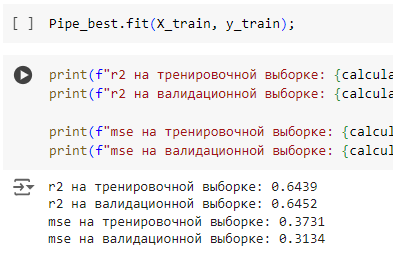

Сравнивая лучшие модели деревьев решений и гистограммного градиентного бустинга, можно заметить, что вторая модель также выигрывает. На валидационной выборке увеличился r2 (0.6769 -> 0.7154) и уменьшилась mse (0.2968 -> 0.2514)

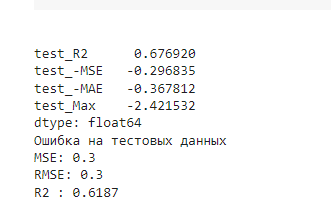